# Decision Tree Regression

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
import pandas as pd

df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Column Names

 1. AT - Atmospheric Temperature in degree Celsius
 2. V - Vacuum Pressure in Pascals
 3. AP - Atomspheric Pressure in Pascals
 4. RH - Relative Humidity in Percentage
 5. PE - Power Output in MW
 6. PE Target Feature


# Step 2 - Perform Basic Data quality checks

In [4]:
df.shape

(9568, 5)

In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(41)

In [7]:
# Drop duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [8]:
df.shape

(9527, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# Step 3 - Seperate X and Y(PE)

In [10]:
X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [12]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


<Axes: xlabel='PE', ylabel='Count'>

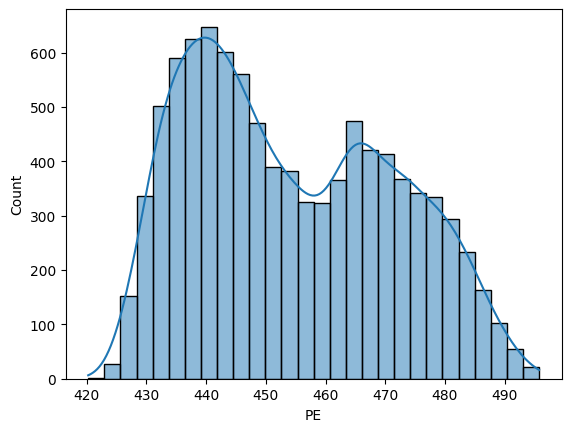

In [14]:
import seaborn as sns

sns.histplot(data=Y, x="PE", kde=True)

# Step 4 - Apply preprocessing on X

In [15]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler()).set_output(
    transform="pandas"
)

In [18]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


# Step 5 - Apply Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)

In [20]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [21]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [22]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [23]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [24]:
xtrain.shape

(7621, 4)

# Step 6 - Build the model

In [25]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="squared_error",
    random_state=42,
)

model1.fit(xtrain, ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [26]:
model1.score(xtrain, ytrain)

0.71765957297802

In [27]:
model1.score(xtest, ytest)

0.7251450398190283

# Hyperparameter tuning

1. Regression Problem use - R2 score
2. Classification Problem use - f1_macro
Techniques

1. GridsearchCV - Will test all possible combinations - Slower
2. RandomisedSearchCV - Will test random optoins for given repitions - Faster

In [29]:
params = {
    "max_depth": [5, 6, 7, 8, 9, 10, 11, 12],
    "min_samples_split": [5, 6, 7],
    "min_samples_leaf": [5, 6, 7],
    "criterion": ["squared_error", "absolute_error"],
}

In [30]:
from sklearn.model_selection import RandomizedSearchCV

dtr = DecisionTreeRegressor(random_state=42)
gscv_dtr = RandomizedSearchCV(
    estimator=dtr, param_distributions=params, cv=5, scoring="r2"
)
gscv_dtr.fit(xtrain, ytrain)

,estimator,DecisionTreeR...ndom_state=42)
,param_distributions,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [5, 6, ...], 'min_samples_leaf': [5, 6, ...], 'min_samples_split': [5, 6, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [31]:
gscv_dtr.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_depth': 9,
 'criterion': 'squared_error'}

In [32]:
gscv_dtr.best_score_

np.float64(0.9402778615231384)

In [33]:
best_dtr = gscv_dtr.best_estimator_
best_dtr

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,7
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


# Step 7 - Evalutate the model

In [34]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [35]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [36]:
print("Train Evaluation : ")
evaluate_model(best_dtr, xtrain, ytrain)

Train Evaluation : 
RMSE : 3.34
MAE : 2.46
MAPE : 0.54%
R2 : 96.11%


In [37]:
print("Test Evaluation : ")
evaluate_model(best_dtr, xtest, ytest)

Test Evaluation : 
RMSE : 3.93
MAE : 2.91
MAPE : 0.64%
R2 : 94.87%


# Step 8 - Visulalize decision Tree and feature importances


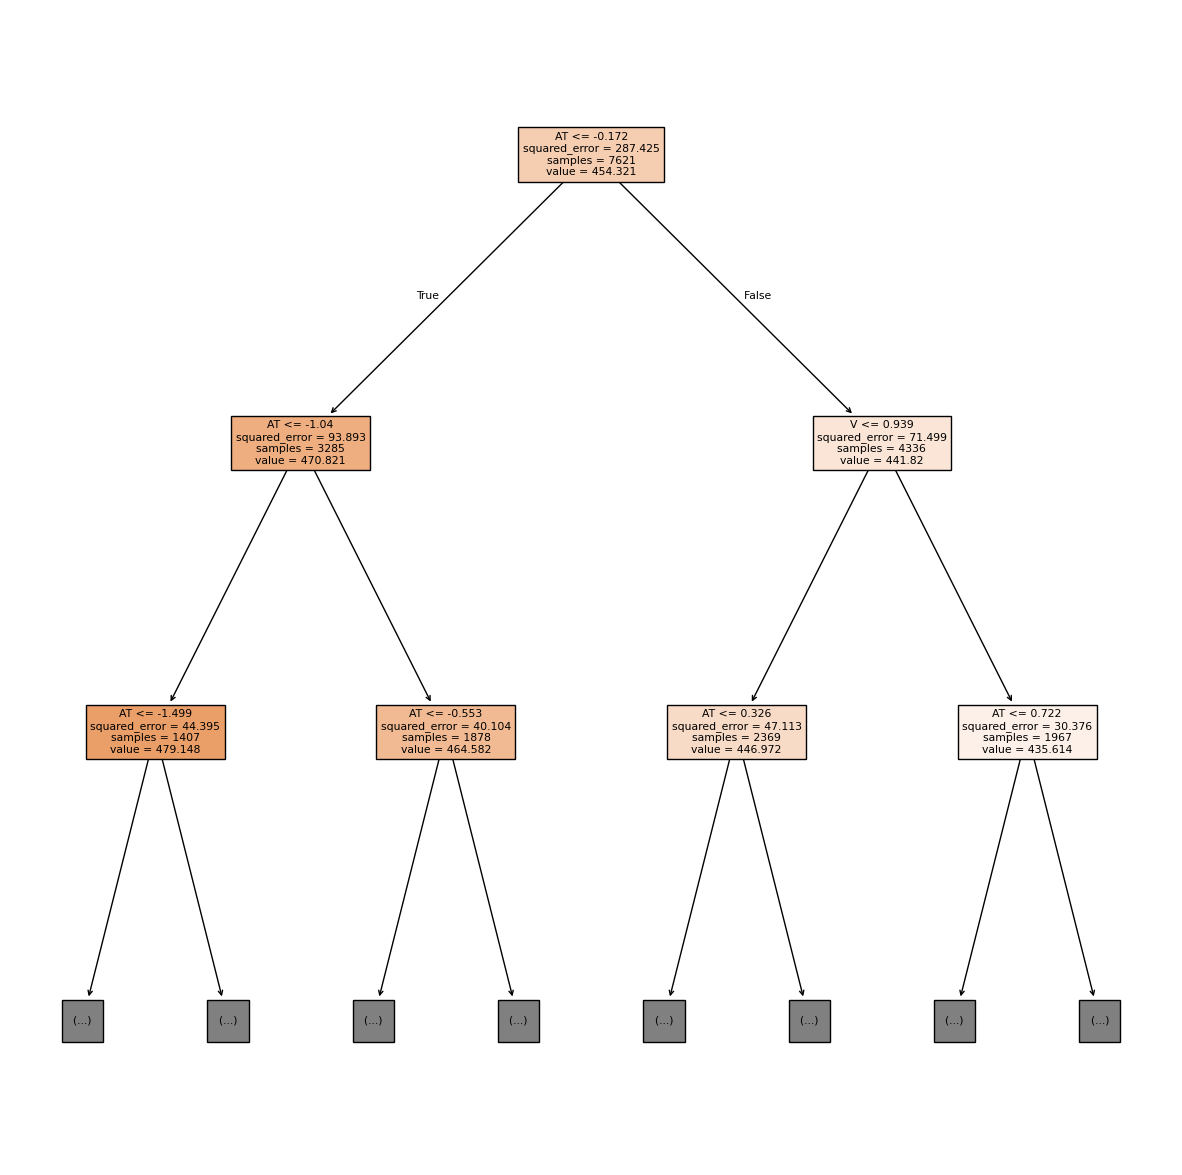

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(best_dtr, filled=True, feature_names=xtrain.columns, max_depth=2)
plt.show()

In [39]:
best_dtr.feature_importances_

array([0.89559909, 0.08640664, 0.01040362, 0.00759064])

In [40]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [41]:
imp = pd.Series(best_dtr.feature_importances_, index=xtrain.columns)
imp

AT    0.895599
V     0.086407
AP    0.010404
RH    0.007591
dtype: float64

In [42]:
imp.sort_values(ascending=False)

AT    0.895599
V     0.086407
AP    0.010404
RH    0.007591
dtype: float64

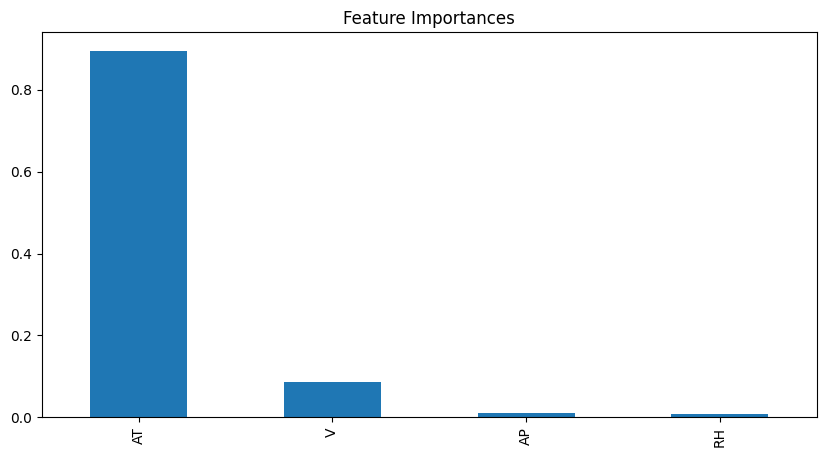

In [43]:
imp.sort_values(ascending=False).plot(
    kind="bar", figsize=(10, 5), title="Feature Importances"
)
plt.show()

# Step 9 - Out of Sample Prediction

In [44]:
xnew = pd.read_csv("test_PowerPlant.csv")
xnew

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97
...,...,...,...,...
95,26.35,69.48,1008.45,70.47
96,11.78,39.96,1011.37,82.95
97,5.62,41.38,1020.91,86.21
98,24.96,74.99,1008.25,80.52


In [45]:
xnew.shape

(100, 4)

In [46]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [47]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [48]:
preds = best_dtr.predict(xnew_pre)
preds

array([445.41838235, 440.0925    , 433.53547619, 443.73473118,
       465.58888889, 445.41838235, 450.10663551, 476.23882353,
       469.31466667, 475.35747664, 454.21137931, 472.501     ,
       450.10663551, 438.87538462, 433.89391304, 432.14096774,
       450.10663551, 463.53727273, 443.765     , 432.55388235,
       434.1629078 , 473.08875   , 480.745     , 433.33285714,
       468.32166667, 443.73473118, 440.15714286, 432.55388235,
       439.96318182, 445.41838235, 482.76714286, 465.68523364,
       439.98058824, 442.60443662, 434.1629078 , 443.58      ,
       466.84769231, 470.25211382, 434.37727273, 472.83826087,
       454.72064516, 454.21137931, 484.388     , 434.57802632,
       454.58222222, 442.60443662, 455.56486486, 449.17807692,
       454.58222222, 456.30181818, 477.78337165, 457.3016129 ,
       471.62320312, 463.27781955, 467.37358491, 446.5884    ,
       432.14096774, 446.96878049, 470.25211382, 472.83826087,
       448.045     , 433.42956522, 456.627     , 449.17

In [49]:
xnew["PE_pred"] = preds.round(2)

In [50]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.42
1,28.88,54.89,1007.16,46.60,440.09
2,27.89,73.21,1001.32,85.88,433.54
3,25.69,62.26,1011.38,74.08,443.73
4,12.16,40.81,1025.79,70.97,465.59
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,434.16
96,11.78,39.96,1011.37,82.95,475.36
97,5.62,41.38,1020.91,86.21,486.83
98,24.96,74.99,1008.25,80.52,437.97


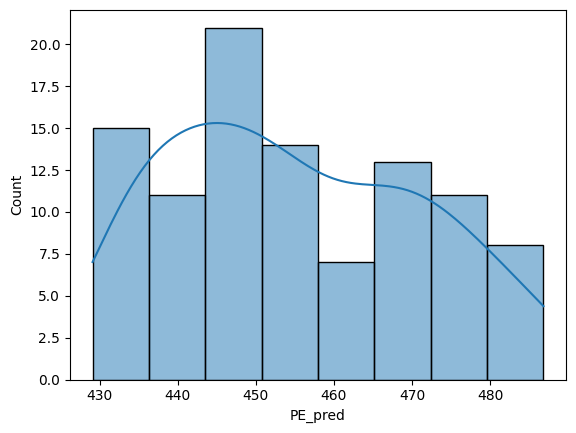

In [51]:
sns.histplot(data=xnew, x="PE_pred", kde=True)
plt.show()

In [52]:
xnew.to_csv("DTR_Results.csv", index=False)

# Step 10 - Save preprocessor and model object in joblib format

In [53]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [54]:
best_dtr

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,7
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [55]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [56]:
joblib.dump(best_dtr, "dtr_model.joblib")

['dtr_model.joblib']

# Load model object

In [57]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [58]:
m = joblib.load("dtr_model.joblib")
m

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,7
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [59]:
m.score(xtrain, ytrain)

0.9611476235328569

In [60]:
m.score(xtest, ytest)

0.9487347298816569